In [1]:
import pandas as pd

In [25]:
# Import some libraries
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# This allows plots to appear on the IPython notebook.
%matplotlib inline 

In [26]:
# Use pandas to import the csv
df_edges = pd.read_csv('data/FoursqureLinksNetwork.csv', sep=",")
df_edges.head()

,FROM-ID,TO-ID,DISTANCE
0,4f3381cae4b0befff0254890,4d90bb7ffa9437048ca338c6,0.050111
1,4f3381cae4b0befff0254890,50e4021b582f294b85631919,0.083781
2,4f3381cae4b0befff0254890,4e341a00e4cdf7a42cad9421,0.046179
3,4f3381cae4b0befff0254890,50433012e4b05698baa75339,0.057012
4,4f3381cae4b0befff0254890,4f8f03f5e4b09b4d92853b2c,0.029747


In [27]:
df_nodes = pd.read_csv('data/FoursqureCheckinNodes.csv', sep=",")
df_nodes.head()


,ID,NAME,CATEGORY,CHECK-IN,LAT,LONG
0,558e5ce5498e164a5cb27afc,�����_�� �_�������� ���_���� - King Khalid Air...,Airport Terminal,21,24.760483,46.705338
1,4ccd23f1c0378cfa93b68b48,Princess Nora University,College Academic Building,532,24.774344,46.728845
2,4da5ec8a4b2280544b678da0,Lulu Hypermarket | �������� ���_�_�������_������,Department Store,6453,24.663989,46.703757
3,50295233e4b0db2acbb75c69,Papparoti | ���_���_�����ș_,Coffee Shop,2168,24.693468,46.669636
4,4da5ec8a4b2280544b678da0,Avenue Mall,Department Store,1474,24.663569,46.703937


In [5]:
df_nodes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448 entries, 0 to 447
Data columns (total 6 columns):
ID          448 non-null object
NAME        448 non-null object
CATEGORY    448 non-null object
CHECK-IN    448 non-null int64
LAT         448 non-null float64
LONG        448 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 24.5+ KB


In [6]:
df_edges.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1578 entries, 0 to 1577
Data columns (total 3 columns):
FROM-ID     1578 non-null object
TO-ID       1578 non-null object
DISTANCE    1578 non-null float64
dtypes: float64(1), object(2)
memory usage: 49.3+ KB


In [28]:
merged = df_edges.merge(df_nodes, left_on='FROM-ID', right_on='ID')

In [29]:
del merged['ID']

In [30]:
len(merged)

1510

In [31]:
merged.rename(columns = {'LAT':'FROM-LAT','LONG':'FROM-LON'},inplace=True)

In [32]:
completeMerge = merged.merge(df_nodes, left_on='TO-ID', right_on='ID')

In [33]:
del completeMerge['ID']

In [34]:
len(completeMerge)

537

In [35]:
completeMerge.rename(columns = {'LAT':'TO-LAT','LONG':'TO-LON'},inplace=True)

In [37]:
completeMerge.head()

,FROM-ID,TO-ID,DISTANCE,NAME_x,CATEGORY_x,CHECK-IN_x,FROM-LAT,FROM-LON,NAME_y,CATEGORY_y,CHECK-IN_y,TO-LAT,TO-LON
0,50295233e4b0db2acbb75c69,4f1d62b0e4b03543a3409cd2,0.129974,Papparoti | ���_���_�����ș_,Coffee Shop,2168,24.693468,46.669636,Wayne's Coffee | ���_�_���_ �������_,Toy / Game Store,3842,24.691873,46.668853
1,4fcf729ae4b07997d3141487,4f1d62b0e4b03543a3409cd2,0.017338,Panorama Foodcourt,Food Court,769,24.692186,46.670004,Wayne's Coffee | ���_�_���_ �������_,Toy / Game Store,3842,24.691873,46.668853
2,4fcf729ae4b07997d3141487,4f1d62b0e4b03543a3409cd2,0.017338,Hamleys ���_�����_�_,Food Court,963,24.692337,46.669961,Wayne's Coffee | ���_�_���_ �������_,Toy / Game Store,3842,24.691873,46.668853
3,5318e95f498eaff004e39f6c,533687b3498ec0c5b90ff33b,0.030966,Candylawa | ���_�����_���_����,Candy Store,2292,24.691785,46.669735,Cafelawa | ���_���_���_���_,Coffee Shop,389,24.691514,46.669664
4,5318e95f498eaff004e39f6c,533687b3498ec0c5b90ff33b,0.030966,VERSUS Versace Caff�� ���_���_�_���Ǚ_ ���_���_��,Candy Store,3005,24.691748,46.669056,Cafelawa | ���_���_���_���_,Coffee Shop,389,24.691514,46.669664


In [20]:
RG = nx.Graph()

node_attrs = df_nodes[['NAME','CATEGORY','CHECK-IN','LAT','LONG']]
for i in range(len(df_nodes['ID'])):
    RG.add_node(df_nodes['ID'][i], nodes_attr=node_attrs.iloc[[i]])
all_nodes = RG.nodes()
nodes_num = RG.number_of_nodes()
print nodes_num
print len(RG.nodes())
#print all_nodes
#print nodes_num
#print df_nodes['ID']

275
275


In [ ]:
completeMerge.info()

In [38]:
keys = ['DISTANCE','FROM-LAT','FROM-LON','TO-LAT','TO-LON']
for idx,row in completeMerge.iterrows():
    edge_attributes = dict(zip(keys, row[keys]))
    node_id = (row['FROM-ID'],row['TO-ID'])
    RG.add_edge(*node_id,attr_dict=edge_attributes)


In [39]:
geoloc = {}
for idx,row in df_nodes.iterrows():
    geoloc[row['ID']]=(row['LAT'],row['LONG'])

In [ ]:
degrees

In [ ]:
type(nx.degree(RG)) 

In [ ]:
len(RG.nodes())

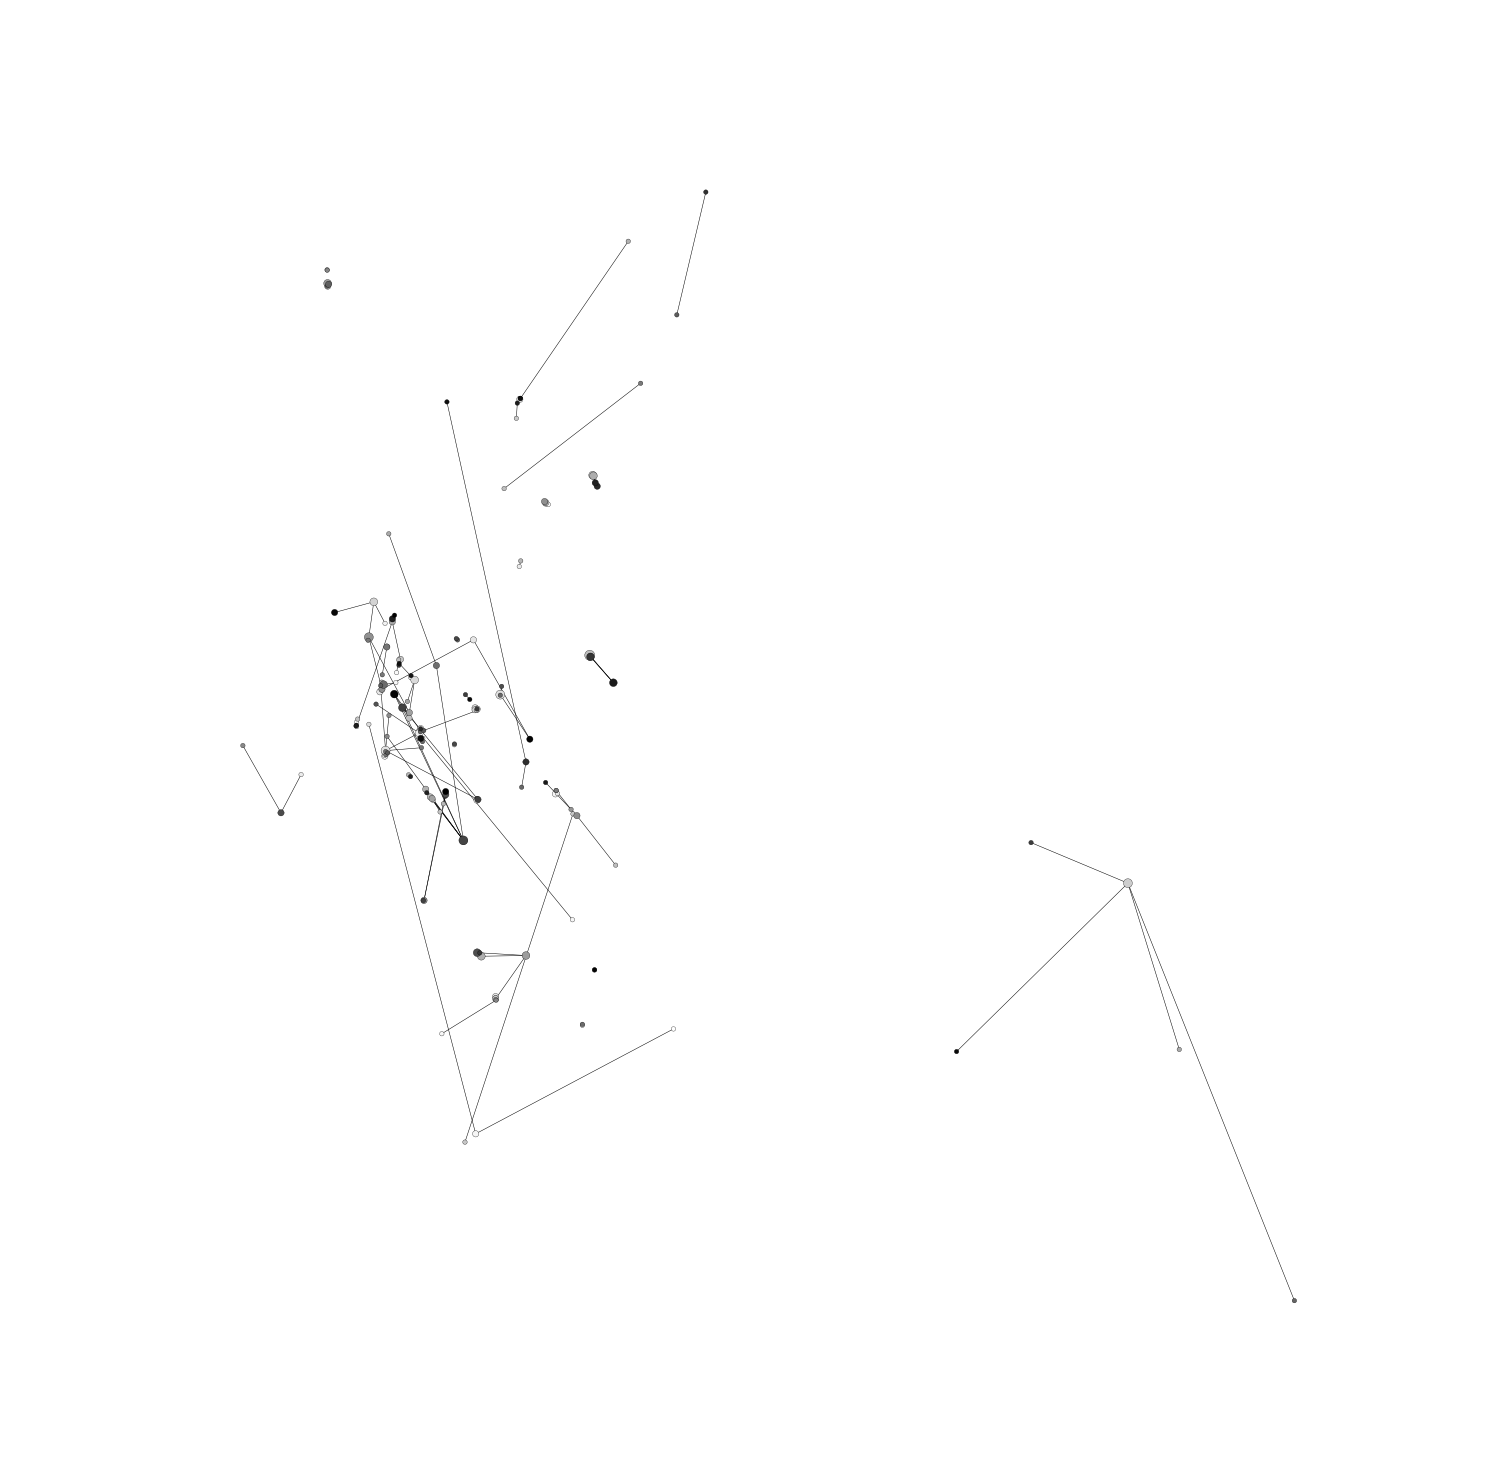

In [40]:
plt.figure(figsize=(20,20))
degrees = nx.degree(RG)    
node_sizes = [v * 20 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos=geoloc,nodelist=degrees.keys(), node_size=[node_sizes], width=.5, node_color=node_colors);

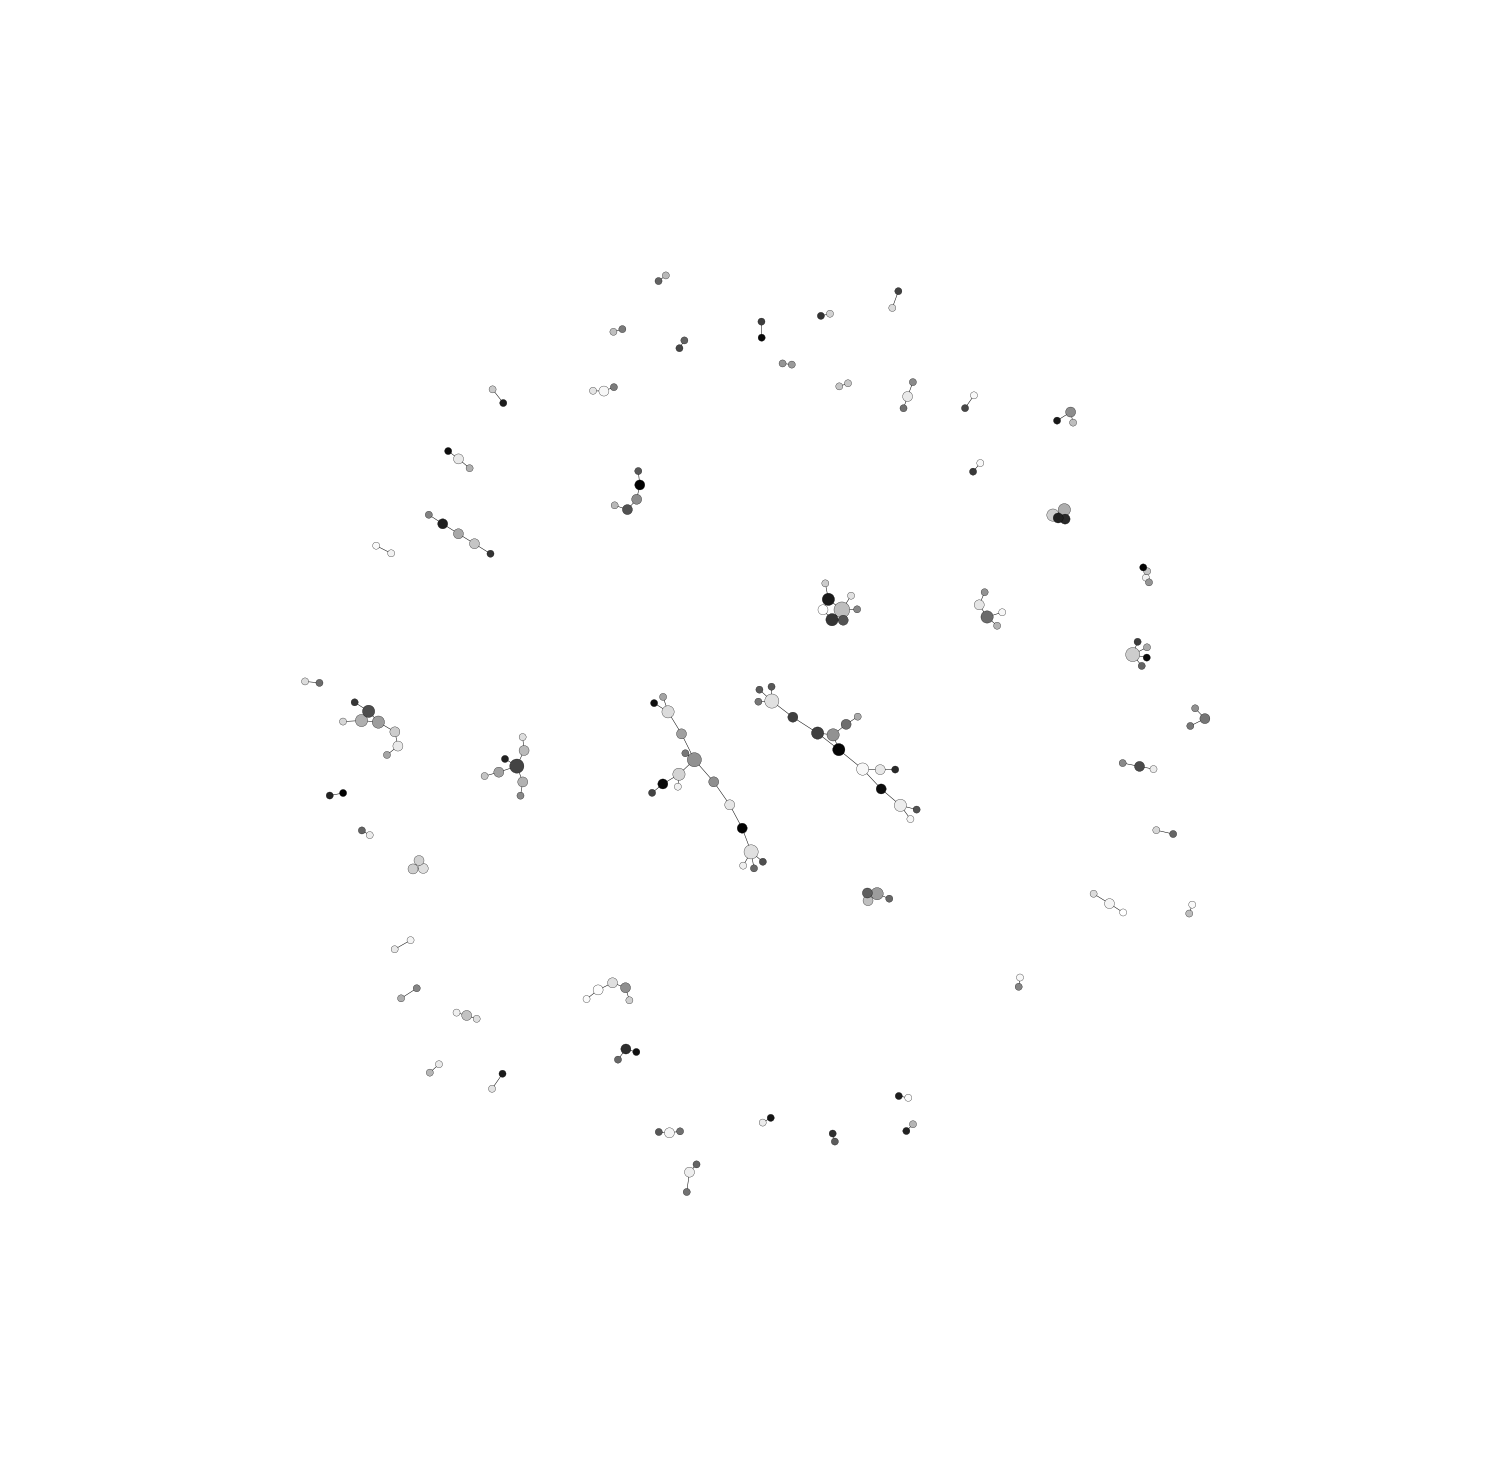

In [24]:
P= nx.spring_layout(RG)
plt.figure(figsize=(20,20))
degrees = nx.degree(RG)    
node_sizes = [v * 50 for v in degrees.values()]
node_colors = range(len(RG.nodes()))
nx.draw(RG, pos = P , nodelist=degrees.keys(), node_size=[node_sizes], width=.5, node_color=node_colors);

keys = ['DISTANCE','FROM-LAT','FROM-LON','TO-LAT','TO-LON']
for row in result_to.itertuples(index = False):
    values = row[2:]
    edge_attributes = dict(zip(keys, values))
    node_id = (row[0],row[1])
    RG.add_edge(*node_id, attr_dict=edge_attributes)
print RG.edges()
print RG.number_of_edges()